<a href="https://colab.research.google.com/github/sohambag10/powerbi/blob/main/ipl%20analytics%20using%20ML%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vinayaks0n1/ipl-2025")

print("Path to dataset files:", path)

100%|██████████| 7.97k/7.97k [00:00<00:00, 6.99MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vinayaks0n1/ipl-2025/versions/1


In [2]:
!pip install kagglehub pandas matplotlib seaborn --quiet


In [3]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Download IPL dataset from KaggleHub
path = kagglehub.dataset_download("vinayaks0n1/ipl-2025")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/ipl-2025


In [7]:
import os

# List files to find correct names
print(os.listdir(path))

['IPL2025Bowlers.csv', 'IPL2025Batters.csv']


In [8]:
bowlers = pd.read_csv(os.path.join(path, 'IPL2025Bowlers.csv'))
batters = pd.read_csv(os.path.join(path, 'IPL2025Batters.csv'))


In [9]:
print("Batters columns:", batters.columns)
print(batters.head())

print("Bowlers columns:", bowlers.columns)
print(bowlers.head())


Batters columns: Index(['Player Name', 'Team', 'Runs', 'Matches', 'Inn', 'No', 'HS', 'AVG',
       'BF', 'SR', '100s', '50s', '4s', '6s'],
      dtype='object')
         Player Name Team  Runs  Matches  Inn  No    HS    AVG   BF      SR  \
0      Sai Sudharsan   GT   759       15   15   1  108*  54.21  486  156.17   
1  Surya Kumar Yadav   MI   717       16   16   5   73*  65.18  427  167.91   
2        Virat Kohli  RCB   657       15   15   3   73*  54.75  454  144.71   
3       Shubman Gill   GT   650       15   15   2   93*  50.00  417  155.87   
4     Mitchell Marsh  LSG   627       13   13   0   117  48.23  383  163.70   

   100s  50s  4s  6s  
0     1    6  88  21  
1     0    5  69  38  
2     0    8  66  19  
3     0    6  62  24  
4     1    6  56  37  
Bowlers columns: Index(['Player Name', 'Team', 'WKT', 'MAT', 'INN', 'OVR', 'RUNS', 'BBI', 'AVG',
       'ECO', 'SR', '4W', '5W'],
      dtype='object')
       Player Name  Team  WKT  MAT  INN   OVR  RUNS   BBI    AVG   ECO    

/tmp/ipython-input-12-46445301.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_batsmen, x='Player Name', y='Runs', palette='Oranges_r')


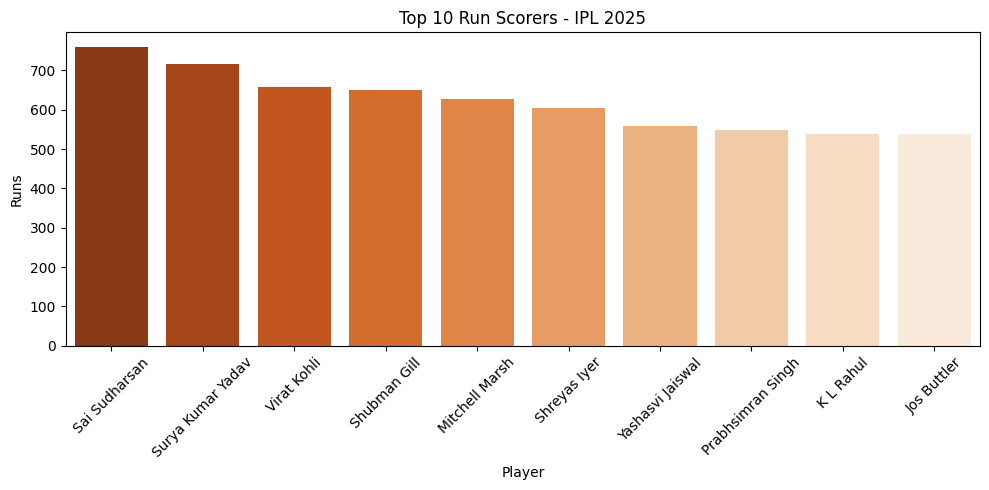

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

top_batsmen = batters.sort_values(by='Runs', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_batsmen, x='Player Name', y='Runs', palette='Oranges_r')
plt.title("Top 10 Run Scorers - IPL 2025")
plt.xlabel("Player")
plt.ylabel("Runs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-522969579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bowlers, x='Player Name', y='WKT', palette='Greens')


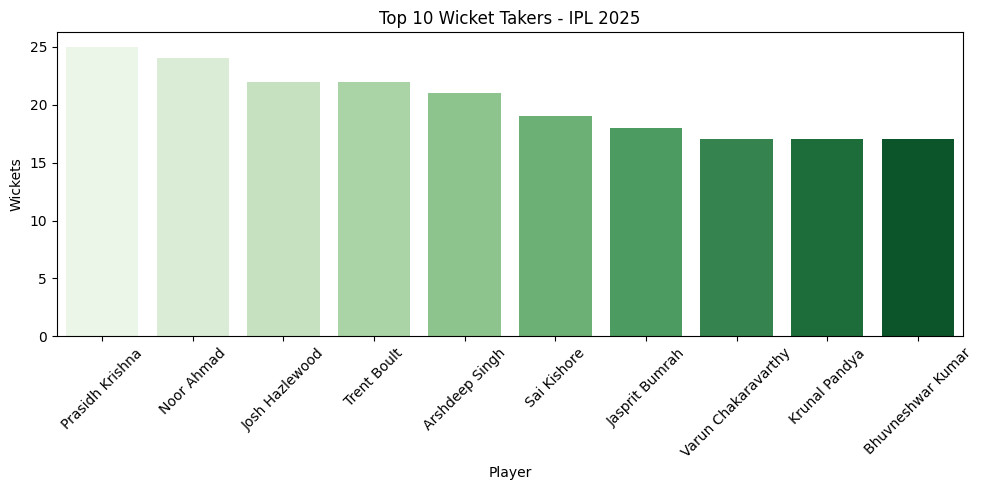

In [13]:
top_bowlers = bowlers.sort_values(by='WKT', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_bowlers, x='Player Name', y='WKT', palette='Greens')
plt.title("Top 10 Wicket Takers - IPL 2025")
plt.xlabel("Player")
plt.ylabel("Wickets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-14-4133718957.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_batsmen_sr, x='Player Name', y='SR', palette='coolwarm')


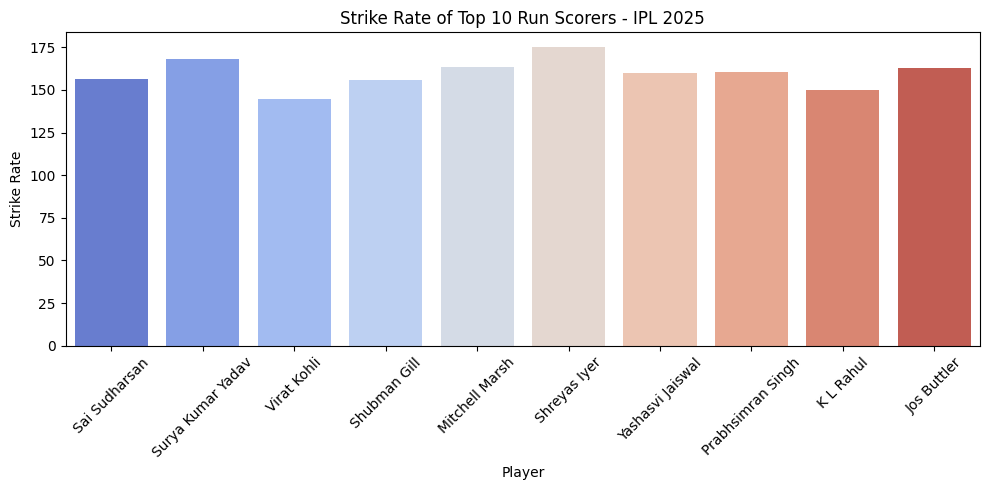

In [14]:
# Top 10 batters by runs with their strike rates
top_batsmen_sr = batters.sort_values(by='Runs', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_batsmen_sr, x='Player Name', y='SR', palette='coolwarm')
plt.title("Strike Rate of Top 10 Run Scorers - IPL 2025")
plt.xlabel("Player")
plt.ylabel("Strike Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


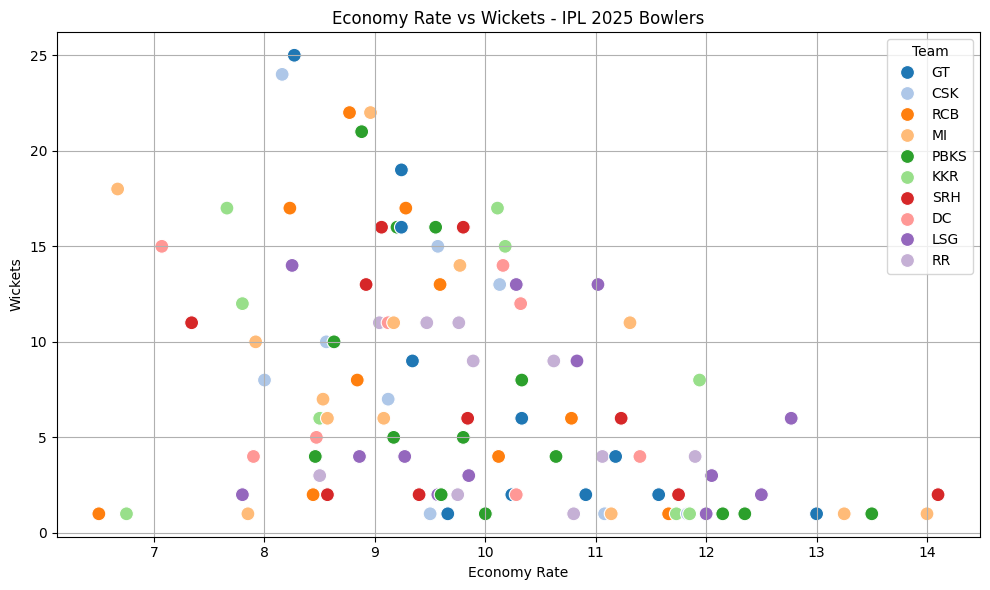

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bowlers, x='ECO', y='WKT', hue='Team', s=100, palette='tab20')
plt.title("Economy Rate vs Wickets - IPL 2025 Bowlers")
plt.xlabel("Economy Rate")
plt.ylabel("Wickets")
plt.grid(True)
plt.tight_layout()
plt.show()


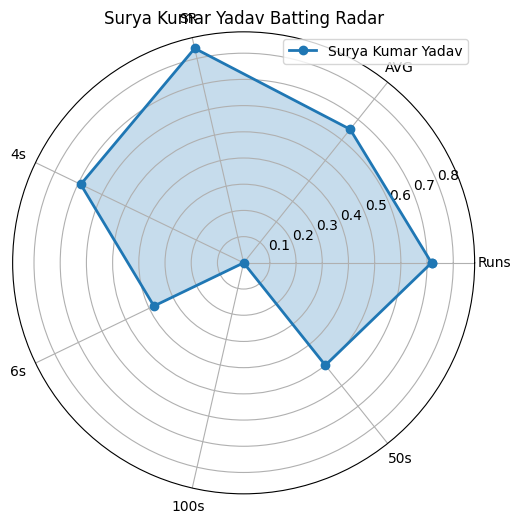

In [20]:
def plot_batter_radar(player_name):
    player = batters[batters['Player Name'] == player_name].iloc[0]

    # Extract and clean relevant stats
    labels = ['Runs', 'AVG', 'SR', '4s', '6s', '100s', '50s']
    values = []
    for col in labels:
        val = player[col]
        try:
            values.append(float(val))
        except:
            values.append(0.0)  # fallback for invalid or missing values

    # Define max values for normalization
    max_values = [1000, 100, 200, 100, 100, 5, 10]
    values_normalized = [v/m for v, m in zip(values, max_values)]

    # Prepare radar chart
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    values_normalized += values_normalized[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values_normalized, 'o-', linewidth=2, label=player_name)
    ax.fill(angles, values_normalized, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(f'{player_name} Batting Radar')
    ax.grid(True)
    plt.legend(loc='upper right')
    plt.show()

# Try it again:
plot_batter_radar('Surya Kumar Yadav')


In [21]:
import ipywidgets as widgets
player_dropdown = widgets.Dropdown(
    options=batters['Player Name'].unique().tolist(),
    description='Select Player:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

widgets.interact(plot_batter_radar, player_name=player_dropdown)

interactive(children=(Dropdown(description='Select Player:', layout=Layout(width='50%'), options=('Sai Sudhars…

<function __main__.plot_batter_radar(player_name)>